In [1]:
# import all the necessary libraries like pandas, matplotlib, seaborn, sklearn, plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# set all the necessary configurations for the graphs
sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_palette("muted")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [3]:
train_data = pd.read_csv(r'C:\Users\Home\Desktop\Machine_Learning\House Prices\house-prices-advanced-regression-techniques\train.csv')
test_data = pd.read_csv(r'C:\Users\Home\Desktop\Machine_Learning\House Prices\house-prices-advanced-regression-techniques\test.csv')

# Part 1: <br> *Analyzing the data*

In [4]:
def show_missing_values_stat(df):
    cols_with_nan = train_data.columns[train_data.isna().any()].tolist()
    subset_df = train_data[cols_with_nan]
    subset_df.info()
    
show_missing_values_stat(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

### we can see that there are missing values in all the features above :
* LotFrontage - 259 
* Alley - 1369 
* MasVnrType - 872 <br>.<br>.<br>.
* MiscFeature - 1406

Total of *19* features with missing values
- 3 of float64
- 16 of object

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### we can see that a lot of the data is missing hance it's will be very hard to fill the missing part and might give us a false information

In [6]:
train_data = train_data.dropna(axis=1, thresh=0.8*len(train_data))

### now we will check the impact of dropping features that have less than 20% data  

In [7]:
show_missing_values_stat(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageYrBlt   1379 non-null   float64
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  GarageCond    1379 non-null   object 
dtypes: float64(3), object(10)
memory usage: 148.4+ KB


## *separate the numerical and categorical columns* ##

In [8]:
train_data_num = train_data.select_dtypes(include=[np.number])
train_data_cat = train_data.select_dtypes(include=[object])

# Part 2: <br> *Data Visualizing*

In [9]:
show_graphs = 0

In [10]:

if show_graphs > 0:
    sns.histplot(train_data['SalePrice'])
    plt.show()

In [11]:
train_data_num.drop('Id', axis=1, inplace=True)
if show_graphs > 0:
    train_data_num.hist(bins=50, figsize=(22, 25))
    plt.show()

### *use a heat map on the numerical data to see the correlation between the features*

In [12]:
show_graphs = 0
def show_corr_mat(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f")
    plt.show()

if show_graphs > 0:
    show_corr_mat(train_data_num)

### low correaltion features: 
 <br>YrSold------------0.03
 <br>LowQualFinSF----0.03
 <br>MiscVal-----------0.02
 <br>MiscVal-----------0.02
 <br>BsmtFinType2-----0.01
 <br>BsmtHalfBath-----0.02

In [13]:
def drop_from_data_set(df, cols: list):
    df.drop(cols, axis=1, inplace=True)

In [14]:
drop_from_data_set(train_data, ["YrSold","LowQualFinSF","MiscVal","MiscVal","BsmtFinType2"])
drop_from_data_set(train_data_num, ["YrSold","LowQualFinSF","MiscVal","MiscVal","BsmtHalfBath"])

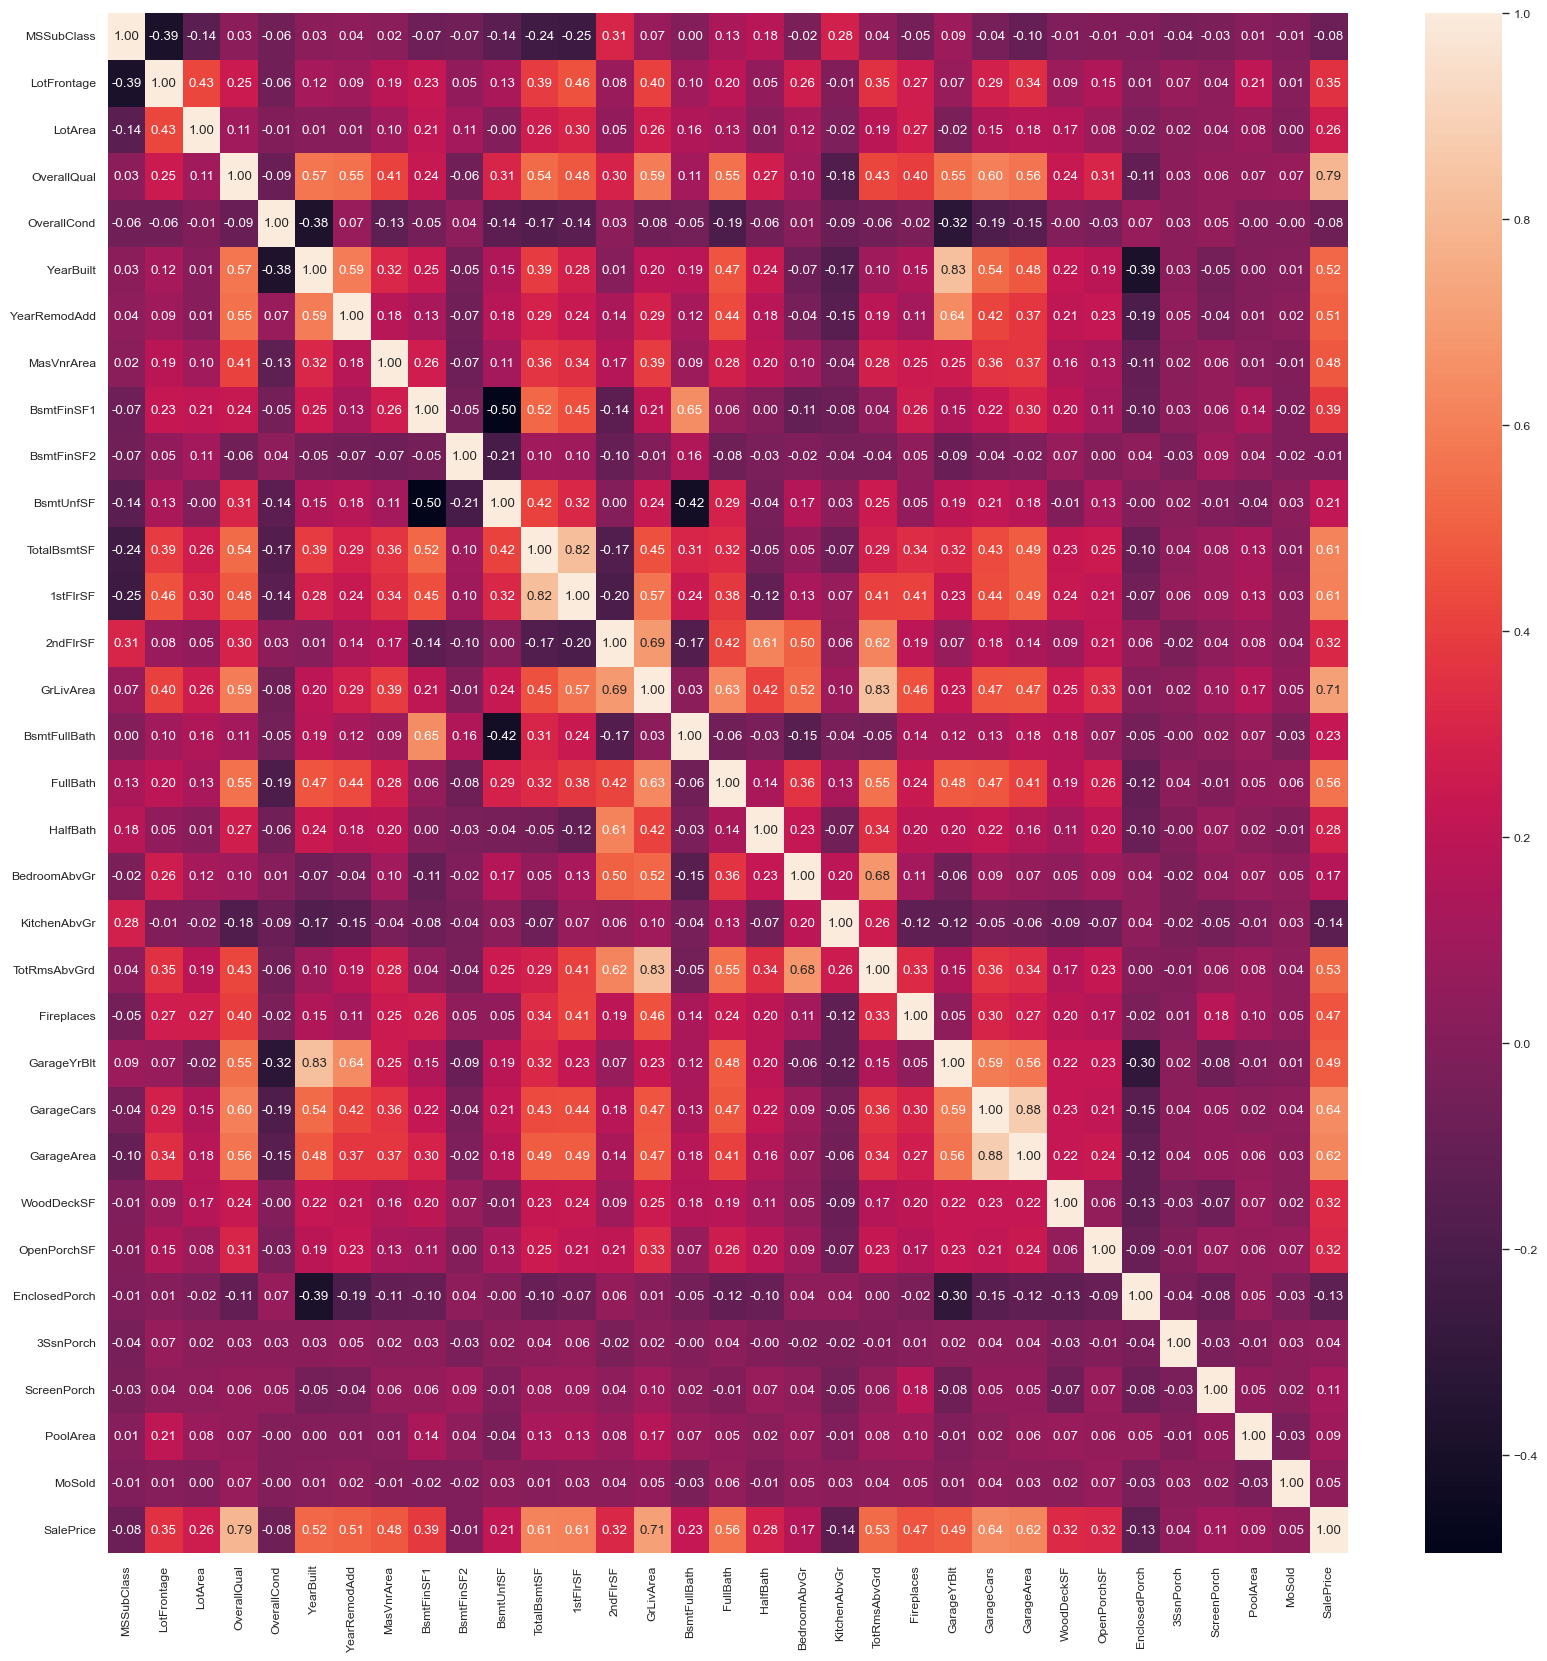

In [15]:
show_graphs = 1
if show_graphs > 0:
    show_corr_mat(train_data_num)

# Part 3: <br>*Handling Missing Data*

In [16]:
show_missing_values_stat(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   Electrical    1459 non-null   object 
 7   GarageType    1379 non-null   object 
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  GarageCond    1379 non-null   object 
dtypes: float64(3), object(9)
memory usage: 137.0+ KB


In [17]:
# filling numerical features (LotFrontage, MasVnrArea, GarageYrBlt) missing values
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean())

In [18]:
show_missing_values_stat(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1423 non-null   object
 1   BsmtCond      1423 non-null   object
 2   BsmtExposure  1422 non-null   object
 3   BsmtFinType1  1423 non-null   object
 4   Electrical    1459 non-null   object
 5   GarageType    1379 non-null   object
 6   GarageFinish  1379 non-null   object
 7   GarageQual    1379 non-null   object
 8   GarageCond    1379 non-null   object
dtypes: object(9)
memory usage: 102.8+ KB


In [19]:
# encode the Bsmt__ features to numerical values
def encode_ex_to_po(df, feature):
    df[feature] = df[feature].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
    return df[feature]

def encode_gd_to_no(df, feature):
    df[feature] = df[feature].map({'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, np.nan: -1})
    return df[feature]

def encode_glq_to_unf(df, feature):
    df[feature] = df[feature].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0})
    return df[feature]

train_data['BsmtQual'] = encode_ex_to_po(train_data, 'BsmtQual')
# train_data['BsmtQual'] = train_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
# train_data['BsmtQual'] = train_data['BsmtQual'].fillna(train_data['BsmtQual'].mean())

train_data['BsmtCond'] = encode_ex_to_po(train_data, 'BsmtCond')
# train_data['BsmtCond'] = train_data['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
# train_data['BsmtCond'] = train_data['BsmtCond'].fillna(train_data['BsmtCond'].mean())

train_data['BsmtExposure'] = encode_gd_to_no(train_data, 'BsmtExposure')
# train_data['BsmtExposure'] = train_data['BsmtExposure'].map({'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, np.nan: -1})
# train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mean())

train_data['BsmtFinType1'] = encode_glq_to_unf(train_data, 'BsmtFinType1')
# train_data['BsmtFinType1'] = train_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0})
# train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mean())


# train_data['BsmtFinSF1'] = train_data['BsmtFinSF1'].fillna(train_data['BsmtFinSF1'].mean())
# train_data['BsmtFinSF2'] = train_data['BsmtFinSF2'].fillna(train_data['BsmtFinSF2'].mean())

train_data[['BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual']].info()    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BsmtFinType1  1460 non-null   int64
 1   BsmtExposure  1460 non-null   int64
 2   BsmtCond      1460 non-null   int64
 3   BsmtQual      1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


## Data Regularizaiton
 <br>Dropout - forward
 <br>weigh decay - backward
 <br>data augmentation

- visualize the strong & weak features <br>  
 # (AFTER FILLING THE MISSING DATA)

In [20]:
# from sklearn.linear_model import LogisticRegression

# # Select features and target
# X = train_data.drop(['SalePrice'], axis=1)
# y = train_data['SalePrice']

# # Encode categorical variables
# X = pd.get_dummies(X)

# # Initialize and fit Logistic Regression model
# log_reg = LogisticRegression(max_iter=1000, random_state=42)
# log_reg.fit(X, y)

# # Get coefficients
# coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
# coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# # Plot coefficients
# plt.figure(figsize=(12, 8))
# sns.barplot(x='Coefficient', y='Feature', data=coefficients)
# plt.title('Feature Coefficients')
# plt.show()

In [21]:
# compare the sale price with a spesific numerical columns using a pairplot
# sns.pairplot(train_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']], hue=train_data['SalePrice'])
# plt.show()